<a href="https://colab.research.google.com/github/twice1st/Detecting-and-Beautifying-Vietnamese-Faces/blob/main/Source%20code/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import cv2
import os
import numpy as np

In [ ]:
def TinhHist(pathfilename):
  img = cv.imread(pathfilename,0)
  hist = cv.calcHist([img],[0],None,
  [256],[0,256])
  size = img.shape[0]*img.shape[1]
  hist = hist / size
  return hist

In [ ]:
path = '/content/drive/MyDrive/CS231/data_all'

In [ ]:
import pickle
def _save_pickle(obj, file_path):
  with open(file_path, 'wb') as f:
    pickle.dump(obj, f)
def _load_pickle(file_path):
  with open(file_path, 'rb') as f:
    obj = pickle.load(f)
  return obj

In [ ]:
path_imgs = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/images_file.pkl")

In [ ]:
path_imgs[1].split("/")[6]

'1_2.jpg'

In [ ]:
def readdata(path_imgs):
  hist_imgs = []
  labels = []
  for path in path_imgs:
    hist = TinhHist(path)
    hist_imgs.append(hist)
    n = path.split("/")[6]
    label = n[:1]
    labels.append(label)
    print(path)
  return hist_imgs, labels

In [ ]:
hist_imgs, labels = readdata(path_imgs)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/CS231/data_all/0_5128.png
/content/drive/MyDrive/CS231/data_all/0_5129.png
/content/drive/MyDrive/CS231/data_all/0_513.png
/content/drive/MyDrive/CS231/data_all/0_5130.png
/content/drive/MyDrive/CS231/data_all/0_5131.png
/content/drive/MyDrive/CS231/data_all/0_5132.png
/content/drive/MyDrive/CS231/data_all/0_5133.png
/content/drive/MyDrive/CS231/data_all/0_5134.png
/content/drive/MyDrive/CS231/data_all/0_5135.png
/content/drive/MyDrive/CS231/data_all/0_5136.png
/content/drive/MyDrive/CS231/data_all/0_5137.png
/content/drive/MyDrive/CS231/data_all/0_5138.png
/content/drive/MyDrive/CS231/data_all/0_5139.png
/content/drive/MyDrive/CS231/data_all/0_514.png
/content/drive/MyDrive/CS231/data_all/0_5140.png
/content/drive/MyDrive/CS231/data_all/0_5141.png
/content/drive/MyDrive/CS231/data_all/0_5142.png
/content/drive/MyDrive/CS231/data_all/0_5143.png
/content/drive/MyDrive/CS231/data_all/0_5144.png
/content/drive/MyDri

In [ ]:
_save_pickle(hist_imgs, "/content/drive/MyDrive/CS231/file/Kiet/hist_images.pkl")
_save_pickle(labels, "/content/drive/MyDrive/CS231/file/Kiet/hist_labels.pkl")

In [ ]:
hist_imgs = _load_pickle("/content/drive/MyDrive/CS231/file/Kiet/hist_images.pkl")
labels = _load_pickle("/content/drive/MyDrive/CS231/file/Kiet/hist_labels.pkl")

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
scaler= StandardScaler()
X = np.array(hist_imgs)
nsamples, nx, ny = X.shape
X_ = X.reshape((nsamples,nx*ny))

In [ ]:
X_.shape

(19589, 256)

In [ ]:
X = scaler.fit_transform(X_)

y = np.array(labels)
y = y.astype(np.int)

In [ ]:
train_ids =  _load_pickle("/content/drive/MyDrive/CS231/file/Trong/id_train.pkl")
test_ids = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/id_test.pkl")

In [ ]:
X_train= [ X[i] for i in train_ids]
y_train= [ y[i] for i in train_ids]
X_test = [ X[i] for i in test_ids]
y_test = [ y[i] for i in test_ids]

In [ ]:
X_train,y_train,X_test,y_test = np.array(X_train), np.array(y_train),np.array(X_test),np.array(y_test)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def draw_cf_matrix(cf_matrix, class_names):
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in class_names],
                    columns = [i for i in class_names])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True,fmt='g')

In [ ]:
class_names= ["Other","Vietnamese"]

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

Classification Report
              precision    recall  f1-score   support

       Other       0.63      0.47      0.54      1918
  Vietnamese       0.59      0.74      0.66      2000

    accuracy                           0.61      3918
   macro avg       0.61      0.60      0.60      3918
weighted avg       0.61      0.61      0.60      3918



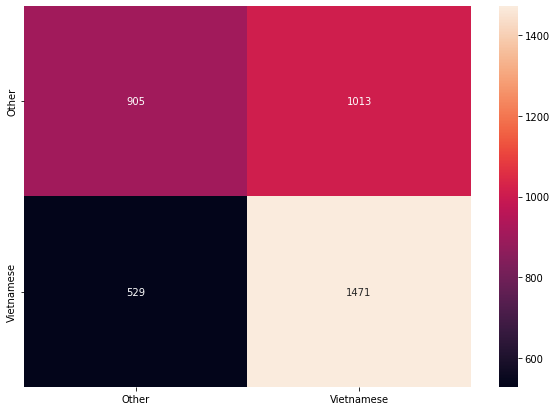

In [ ]:
model = svm.SVC(kernel='linear')

history= model.fit(X_train, y_train)

y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred= y_pred.reshape(y_pred.shape[0])

y_pred = y_pred.astype('str')
for i in range(len(y_pred)):
    y_pred[i] = class_names[int(y_pred[i])]

y_test = y_test.astype('str')
for i in range (len(y_test)):
    if y_test[i]=='0':
        y_test[i]="Other"
    else:
        y_test[i]="Vietnamese"
    
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))  
    
cf_matrix = confusion_matrix(y_test, y_pred)
draw_cf_matrix(cf_matrix, class_names)

In [ ]:
a = 0
for i in range(len(y_test)):
  if y_pred[i] != y_test[i]:
    a+=1
a

1542

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 10)

Classification Report
              precision    recall  f1-score   support

       Other       0.55      0.80      0.65      1918
  Vietnamese       0.66      0.38      0.49      2000

    accuracy                           0.59      3918
   macro avg       0.61      0.59      0.57      3918
weighted avg       0.61      0.59      0.57      3918



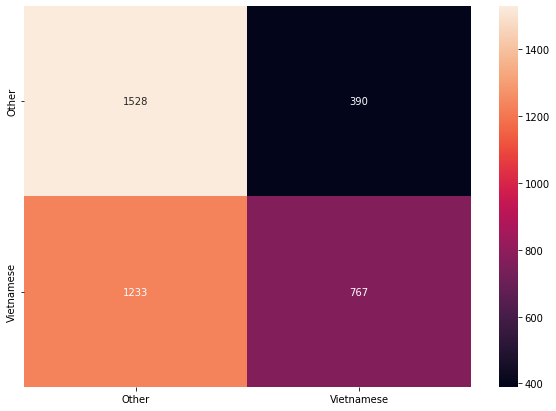

In [ ]:
model = KNeighborsClassifier(n_neighbors = 10)

history= model.fit(X_train, y_train)

y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred= y_pred.reshape(y_pred.shape[0])

y_pred = y_pred.astype('str')
for i in range(len(y_pred)):
    y_pred[i] = class_names[int(y_pred[i])]

y_test = y_test.astype('str')
for i in range (len(y_test)):
    if y_test[i]=='0':
        y_test[i]="Other"
    else:
        y_test[i]="Vietnamese"
    
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))  
    
cf_matrix = confusion_matrix(y_test, y_pred)
draw_cf_matrix(cf_matrix, class_names)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
len(X_train)

15671

In [ ]:
X_train_ = X_train.reshape(15671,1*256)

In [ ]:
X_train.shape

(15671, 256)

In [ ]:
X_test.shape

(3918, 256)

In [ ]:
def create_model():
	model = Sequential()
	model.add(Dense(10, input_dim=256, activation='relu'))
	model.add(Dense(5, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

Epoch 1/50
245/245 [==============================] - 1s 2ms/step - loss: 0.6578 - accuracy: 0.6023
Epoch 2/50
245/245 [==============================] - 1s 2ms/step - loss: 0.6381 - accuracy: 0.6234
Epoch 3/50
245/245 [==============================] - 1s 2ms/step - loss: 0.6325 - accuracy: 0.6351
Epoch 4/50
245/245 [==============================] - 1s 2ms/step - loss: 0.6292 - accuracy: 0.6349
Epoch 5/50
245/245 [==============================] - 1s 2ms/step - loss: 0.6273 - accuracy: 0.6364
Epoch 6/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.6374
Epoch 7/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.6429
Epoch 8/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.6439
Epoch 9/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.6457
Epoch 10/50
245/245 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6478

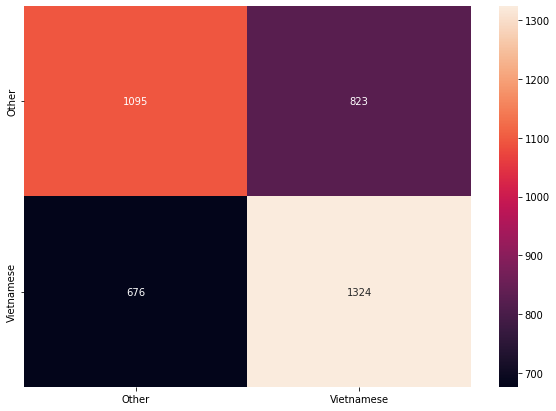

In [ ]:
model = create_model()

history= model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred= y_pred.reshape(y_pred.shape[0])

y_pred = y_pred.astype('str')
for i in range(len(y_pred)):
    y_pred[i] = class_names[int(y_pred[i])]

y_test = y_test.astype('str')
for i in range (len(y_test)):
    if y_test[i]=='0':
        y_test[i]="Other"
    else:
        y_test[i]="Vietnamese"
    
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))  
    
cf_matrix = confusion_matrix(y_test, y_pred)
draw_cf_matrix(cf_matrix, class_names)

In [ ]:
y_pred[1]

array([0, 0, 0], dtype=int32)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
path_imgs = _load_pickle("/content/drive/MyDrive/CS231/file/Trong/images_file.pkl")

In [ ]:
def test(y_pred,path, test_ids, x):
  a = 0
  if x in test_ids:
    for i in range(len(y_pred)):
      if test_ids[i] == x:
        a = i
    print('ket qua:', y_pred[a])
    print(path[x])   
    image = cv2.imread(path[x])
    cv2_imshow(image)
  else:
    print('abc')


In [ ]:
a = 0
for i in range(len(y_test)):
  if y_pred[i] != y_test[i]:
    a+=1
a

1499